In [369]:
#Import required library...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [370]:
#loading data..
df=pd.read_csv("Zomato data .csv")

In [371]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


# DATA CLEANING

In [372]:
#lets check shape of our dataset...
df.shape

(148, 7)

In [373]:
#lets check null values in our dataset
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [374]:
#let summarize dataset
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [376]:
#i want only '4.1' from rate so we will split from '/' 
df["rate"]=df["rate"].str.split("/").str[0]

In [377]:
df["rate"]

0      4.1
1      4.1
2      3.8
3      3.7
4      3.8
      ... 
143    3.3
144    3.3
145    4.0
146    3.0
147    3.9
Name: rate, Length: 148, dtype: object

In [378]:
#now change datatype object to float..
df["rate"]=df["rate"].astype(float)

In [379]:
#df.info()
df.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


# EXPLORATORY DATA ANALYSIS...

Text(0.5, 0, 'Resturant type')

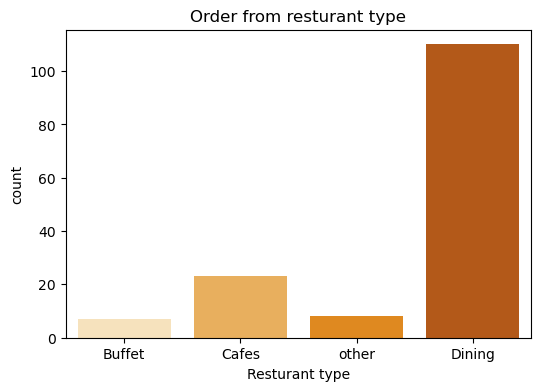

In [380]:
#What type of restaurant do the majority of customers order from?
colors = ["#FFE5B4", "#FFB347", "#FF8C00", "#CC5500"]                                    
plt.figure(figsize=(6,4))
sns.countplot(x="listed_in(type)", data=df, palette=colors)
plt.title("Order from resturant type")
plt.xlabel("Resturant type")

In [381]:
#How many votes has each type of restaurant received from customers?
df.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


In [382]:
data=df.groupby(df["listed_in(type)"])["votes"].sum().reset_index()

In [383]:
data

,listed_in(type),votes
0,Buffet,3028
1,Cafes,6434
2,Dining,20363
3,other,9367


Text(0.5, 1.0, 'Resturant received vote')

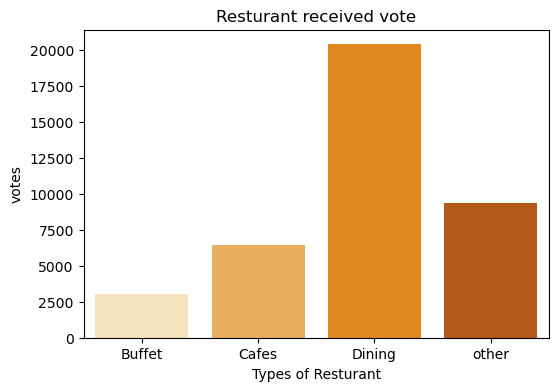

In [384]:
colors = ["#FFE5B4", "#FFB347", "#FF8C00", "#CC5500"]  
#cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=4)

# Create the barplot and apply the gradient palette
plt.figure(figsize=(6,4))
sns.barplot(x="listed_in(type)", y="votes", data=data, palette=colors)
plt.xlabel("Types of Resturant")
plt.title("Resturant received vote")

In [385]:
#INSIGHT- From the above analysis we can say most of the customer voting 'Dining' resturant.

In [386]:
#Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

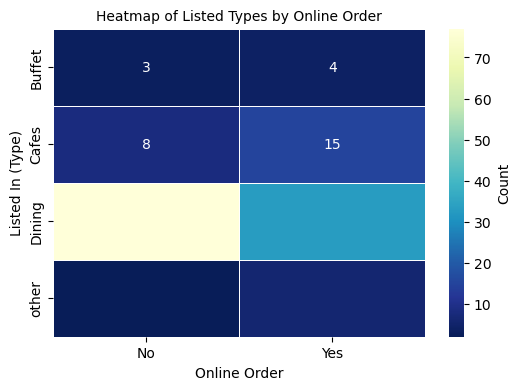

In [387]:
data = df.pivot_table(index="listed_in(type)", columns="online_order", aggfunc="size", fill_value=0)

plt.figure(figsize=(6, 4))  # Adjusting the figure size for better readability
sns.heatmap(data, cmap='YlGnBu_r', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Count'})
plt.title('Heatmap of Listed Types by Online Order', fontsize=10)
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')

plt.show()


In [388]:
#INSIGHT-Dining resturant accept primarily offline orders whereas Cafes accept online orders,
#this suggest that customers prefer to place orders in person at resturant, but prefer online orders from cafe

In [389]:
 #What are the ratings that the majority of restaurants have received?

In [390]:
df.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


Text(0.5, 1.0, 'Rating distribution')

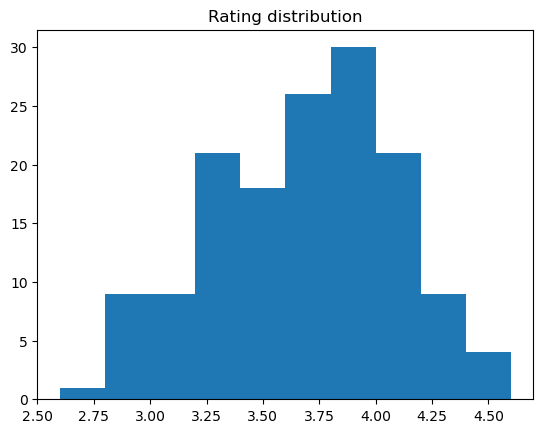

In [391]:
plt.hist(df["rate"],bins=10)
plt.title("Rating distribution")

In [392]:
#INSIGHT- the majority of restaurants receiving rating between 3.5 to 4.2

In [393]:
#Zomato has observed that most couples order most of their food online. What is their average spending on each order?
df.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


Text(0.5, 1.0, 'Average amount spend')

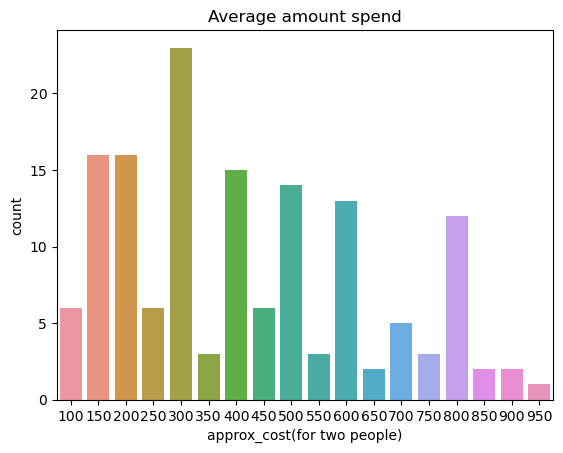

In [394]:
sns.countplot(x="approx_cost(for two people)",data=df)
plt.title("Average amount spend")
#plt.xticks(rotation=45)

In [395]:
#we can say from the above analysis majority of customer spending average 300 rs for order. 

In [396]:
#Which mode (online or offline) has received the maximum rating?
df.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


Text(0.5, 1.0, 'Order_mode')

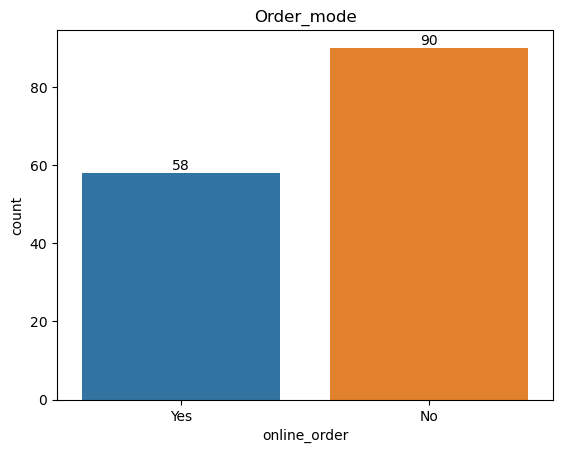

In [397]:
ax=sns.countplot(x="online_order",data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Order_mode")

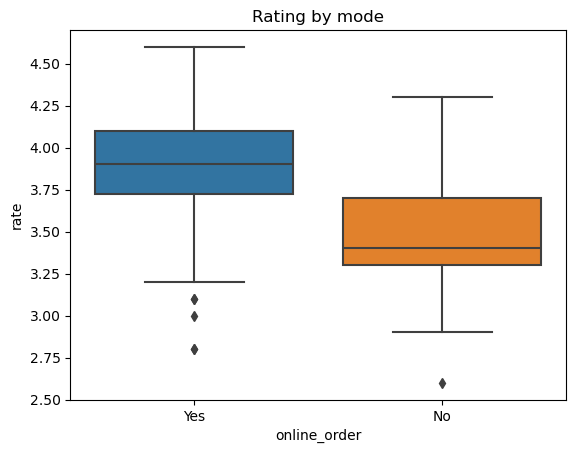

In [398]:
sns.boxplot(x="online_order",y="rate",data=df)
plt.title("Rating by mode")
plt.show()

In [399]:
#We can say that from the above analysis Online mode receiving higher rating in comparison to offline mode.

In [400]:
#INSIGHT- Most of the Customers preferred order from dining resturant.
#INSIGHT- From the above analysis we can say most of the customer voting 'Dining' resturant.
#INSIGHT-Dining resturant accept primarily offline orders whereas Cafes accept online orders,
#        this suggest that customers prefer to place orders in person at resturant, but prefer online orders from cafe
#INSIGHT- the majority of restaurants receiving rating between 3.5 to 4.2
#INSIGHT- we can say from the above analysis majority of customer spending average 300 rs for order.
#INSIGHT -We can say that from the above analysis Online mode receiving higher rating in comparison to offline mode.